In [1]:
from pathlib import Path
from src.blocks import BlockAnalyzer, Block, block_decomposition, Decomposer

In [4]:
Block(K=[1,2,3],i=2,j=7,label="ACGTAC").to_positional_string()

PositionalString(b='ACGTAC', i=2, j=7)

In [2]:
path_blocks = Path("out/blocks/Cluster_10644.json")
list_blocks = BlockAnalyzer()._load_list_blocks(path_blocks)

In [3]:
list_blocks

[Block(K=(1, 2), i=0, j=75, label='CACGATTCTCCCTTTGAGTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGC'),
 Block(K=(0, 1, 2), i=0, j=15, label='CACGATTCTCCCTTTG'),
 Block(K=(0, 1), i=17, j=81, label='GTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGCGAAAAA'),
 Block(K=(0, 1, 2), i=17, j=75, label='GTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGC'),
 Block(K=(0, 1, 2), i=77, j=81, label='AAAAA')]

In [4]:
decomposer=Decomposer()
new_blocks = decomposer(list_blocks)

In [5]:
len(new_blocks), len(list_blocks)

(9, 5)

In [7]:
from collections import defaultdict
d = defaultdict(int)
for block in new_blocks:
    d[ block ] +=1
d

defaultdict(int,
            {Block(K=(1, 2), i=16, j=75, label='AGTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGC'): 1,
             Block(K=(0, 1, 2), i=77, j=81, label='AAAAA'): 1,
             Block(K=(0, 1, 2), i=0, j=15, label='CACGATTCTCCCTTTG'): 1,
             Block(K=(0, 1), i=17, j=81, label='GTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGCGAAAAA'): 1,
             Block(K=(0, 1), i=17, j=76, label='GTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGCG'): 1,
             Block(K=(1, 2), i=0, j=75, label='CACGATTCTCCCTTTGAGTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGC'): 1,
             Block(K=(0, 1, 2), i=17, j=75, label='GTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGC'): 1,
             Block(K=(0, 1), i=76, j=81, label='GAAAAA'): 1,
             Block(K=(1, 2), i=0, j=16, label='CACGATTCTCCCTTTGA'): 1})

___
## Number of vertical identical cols in an MSA
Given an MSA, count the proportion (or number) of columns that contains only one character (or an indel) 

In [4]:
# from Bio import AlignIO #load MSA
# from src.utils.monitor_values_plus import MonitorValuesPlus

In [22]:
# class AnalyzerMSA:

#     def __init__(self, path_msa: str):
#         self.path_msa = path_msa
#         self.cols_msa = None # will be updated when the MSA is loaded
#         self.seqs = self.get_seqs(path_msa)# sequences in the MSA

#     def get_column(self, idx: int) -> list:
#         return [seq[idx] for seq in self.seqs]

#     def get_seqs(self,path_msa):
#         # load MSA
#         align=AlignIO.read(path_msa, "fasta")
#         self.cols_msa = align.get_alignment_length()
        
#         # extract sequences
#         seqs = []
#         for record in align:
#             seqs.append(record.seq)
#         return seqs

#     def is_one_character(self, column) -> bool:
#         chars = list(set(column)-set("-"))
#         if len(chars)==1:
#             return True
#         return False

#     def analyze_msa(self,) -> list[bool]:
#         """evaluate each column and verify if it contains only one character 
#         (indels are not taken into consideration)"""
#         results = []
#         for idx in range(self.cols_msa):
#             column = self.get_column(idx)
#             results.append(
#                 self.is_one_character(column)
#             )
#         return results

In [2]:
import pandas as pd
from pathlib import Path
# from rich.progress import track
from tqdm import tqdm
from src.utils import MonitorValuesPlus
from src.msa import AnalyzerMSA

analyzer = AnalyzerMSA()

mv = MonitorValuesPlus(list_vars=["path_msa","n_identical_cols","n_cols", "proportion"],
                        out_file="out/analysis-msa/stats.tsv",
                        overwrite=True)

# data_blocks=pd.read_csv("out/stats_blocks.tsv",sep="\t")
# list_paths = data_blocks["path_msa"].tolist()
list_paths = list(Path("/data/msas/msas").rglob("*.fa"))[:10]

# analyzer(list_paths[0])
for path_msa in tqdm(list_paths):
    try:
        n_cols, n_seqs, n_unique_seqs, n_identical_cols = analyzer(path_msa)
        proportion = round(100*n_identical_cols/n_cols, 2)

        mv()
    except: 
        continue

100%|██████████| 10/10 [00:00<00:00, 339.41it/s]


In [40]:
stats_msa = pd.DataFrame(mv.values)
stats_msa.describe()

n_identical_cols        n_cols    proportion
count      37421.000000  37421.000000  37421.000000
mean         520.609016    550.422811     95.767181
std          596.573503    635.783659      6.938184
min           25.000000     30.000000     30.770000
25%          169.000000    177.000000     93.230000
50%          312.000000    327.000000     99.800000
75%          692.000000    738.000000    100.000000
max        13377.000000  13377.000000    100.000000

<AxesSubplot: xlabel='proportion', ylabel='Count'>

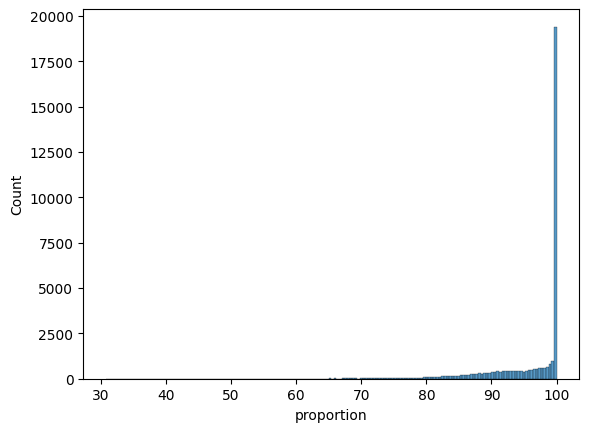

In [41]:
import seaborn as sns
sns.histplot(
    data=stats_msa,
    x="proportion"
)